<a href="https://colab.research.google.com/github/RojaCM/DEEP-LEARNING-/blob/main/CovidCNN_XrayClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 777M/778M [00:07<00:00, 110MB/s]
100% 778M/778M [00:07<00:00, 108MB/s]


In [4]:
!unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
os.listdir('/content/COVID-19_Radiography_Dataset/COVID')

['images', 'masks']

In [7]:
covidimage=os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images')

In [8]:
len(os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [9]:
normalimage=os.listdir('/content/COVID-19_Radiography_Dataset/Normal/images')

In [10]:
len(normalimage)

10192

In [11]:
normal_image=normalimage[:3700]

In [12]:
len(normal_image)

3700

In [13]:
os.mkdir('dataset')

In [14]:
os.mkdir('dataset/covid')

In [15]:
os.mkdir('dataset/normal')

In [16]:
import shutil

In [17]:
covid_dataset='/content/dataset/covid/'
normal_dataset='/content/dataset/normal/'

In [18]:
source_dataset1='/content/COVID-19_Radiography_Dataset/COVID/images/'
source_dataset2='/content/COVID-19_Radiography_Dataset/Normal/images/'

In [19]:
# Loop through the image names and move them to the destination folder
for image_name in covidimage:
    shutil.copy(os.path.join(source_dataset1, image_name), covid_dataset)

In [20]:
len(os.listdir('/content/dataset/covid'))

3616

In [21]:
# Loop through the image names and move them to the destination folder
for image_name in normal_image:
    shutil.copy(os.path.join(source_dataset2, image_name), normal_dataset)

In [22]:
len(os.listdir('/content/dataset/normal'))

3700

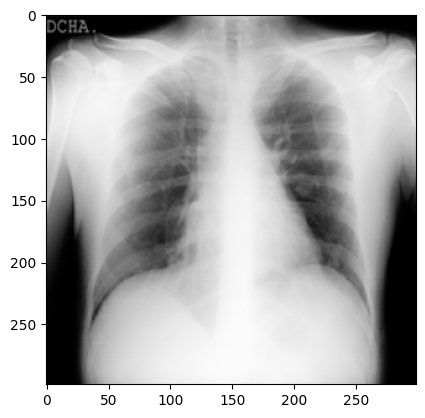

In [23]:
#x-ray of covid person
img=cv2.imread('/content/dataset/covid/COVID-1000.png')
plt.imshow(img)

In [24]:
print(img.shape)

(299, 299, 3)


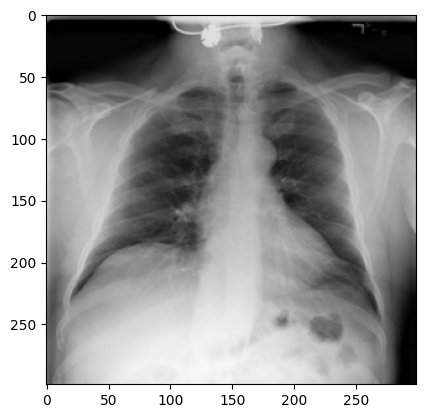

In [25]:
#x-ray of normal person
img1=cv2.imread('/content/dataset/normal/Normal-10000.png')
plt.imshow(img1)

In [26]:
print(img1.shape)

(299, 299, 3)


#Image Processing
Convert the images to numpy array

In [27]:
covid_dataset='/content/dataset/covid/'
normal_dataset='/content/dataset/normal/'

In [28]:
dataset=[]
for i in covidimage:

  image=Image.open(covid_dataset+i)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image = image / 255.0
  dataset.append(image)

In [29]:
for i in normal_image:

  image=Image.open(normal_dataset+i)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  image = image / 255.0
  dataset.append(image)

In [30]:
len(dataset)

7316

In [31]:
3700+3616

7316

In [32]:
dataset[0].shape

(128, 128, 3)

Creating Labels for the two class of Images

having covid --> 1

no covid --> 0

In [33]:
len(covidimage)

3616

In [34]:
covid_labels=[1]*3616

In [35]:
normal_person_labels=[0]*3700

In [36]:
targets=covid_labels+normal_person_labels

In [37]:
len(targets)

7316

In [38]:
print(covid_labels[:5])

[1, 1, 1, 1, 1]


In [39]:
print(covidimage[:5])

['COVID-3191.png', 'COVID-1540.png', 'COVID-2009.png', 'COVID-2535.png', 'COVID-1049.png']


In [40]:
print(normal_person_labels[:5])

[0, 0, 0, 0, 0]


In [41]:
print(normal_image[:5])

['Normal-6166.png', 'Normal-3612.png', 'Normal-3497.png', 'Normal-2415.png', 'Normal-2882.png']


In [42]:
# converting image list and label list to numpy arrays

X = np.array(dataset)
Y = np.array(targets)

In [43]:
type(X)

numpy.ndarray

In [44]:
type(Y)

numpy.ndarray

Train Test Split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(7316, 128, 128, 3) (5852, 128, 128, 3) (1464, 128, 128, 3)



Building a Convolutional Neural Networks (CNN)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [48]:
model = Sequential([
    Conv2D(32, 3, input_shape=(128,128,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [49]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
# training the neural network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
165/165 [==============================] - 117s 673ms/step - loss: 0.4796 - acc: 0.7605 - val_loss: 0.3336 - val_acc: 0.8549
Epoch 2/10
165/165 [==============================] - 107s 645ms/step - loss: 0.3023 - acc: 0.8711 - val_loss: 0.2830 - val_acc: 0.8754
Epoch 3/10
165/165 [==============================] - 102s 620ms/step - loss: 0.2498 - acc: 0.8973 - val_loss: 0.2323 - val_acc: 0.9027
Epoch 4/10
165/165 [==============================] - 100s 607ms/step - loss: 0.1955 - acc: 0.9273 - val_loss: 0.1771 - val_acc: 0.9317
Epoch 5/10
165/165 [==============================] - 101s 610ms/step - loss: 0.1642 - acc: 0.9396 - val_loss: 0.1797 - val_acc: 0.9352
Epoch 6/10
165/165 [==============================] - 100s 608ms/step - loss: 0.1257 - acc: 0.9531 - val_loss: 0.1679 - val_acc: 0.9334
Epoch 7/10
165/165 [==============================] - 99s 597ms/step - loss: 0.1211 - acc: 0.9559 - val_loss: 0.2267 - val_acc: 0.9283
Epoch 8/10
165/165 [=============================

In [52]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

46/46 [==============================] - 8s 172ms/step - loss: 0.3205 - acc: 0.9208
Test Accuracy = 0.9207650423049927


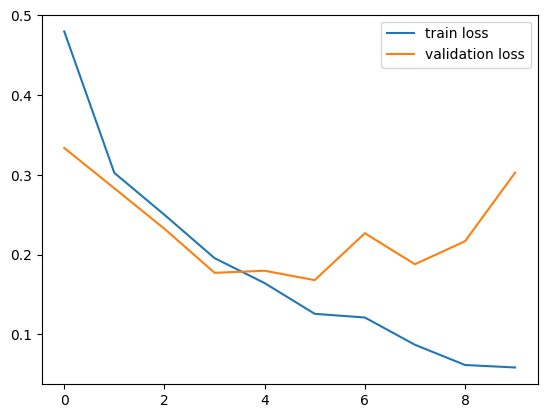

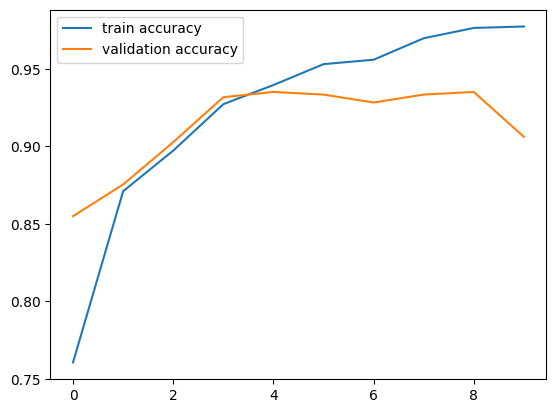

In [53]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/download (2).jfif


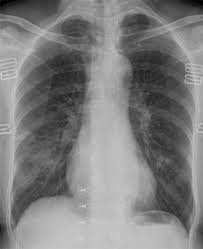

1/1 [==============================] - 0s 36ms/step
[[0.03996647 0.94766885]]
1
The person has affected with covid


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person has affected with covid')

else:

  print('The person has not affected with covid')

Path of the image to be predicted: /content/images (8).jfif


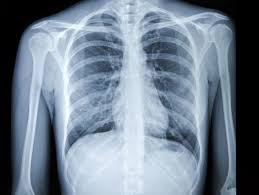

1/1 [==============================] - 0s 28ms/step
[[4.1816398e-04 9.9916327e-01]]
1
The person has affected with covid


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person has affected with covid')

else:

  print('The person has not affected with covid')